In [13]:
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('problem1.tsv', sep='\t')
data = df.values

def compute_pji(data, sigma2):
    n = data.shape[0]
    pji = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                pji[i, j] = np.exp(-np.linalg.norm(data[i] - data[j])**2 / (2 * sigma2))
        pji[i] /= np.sum(pji[i])
        
    return pji

sigma2 = 0.1
pji_matrix_sigma_1 = compute_pji(data, 0.1)
pji_matrix_sigma_2= compute_pji(data, 10)
pji_matrix_sigma_3= compute_pji(data, 100)

pji_matrix_sigma_4 = compute_pji(data, 1)
# print(pji_matrix_sigma_1)
#summing the rows of the matrix

sum_rows = np.sum(pji_matrix_sigma_1, axis=1)
print(sum_rows)


[[0.00000000e+00 4.01419992e-08 6.23217449e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.19277745e-08 0.00000000e+00 2.24322326e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.21826878e-02 1.09665551e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.85430292e-30 2.20243197e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29311741e-29
  0.00000000e+00 4.23367135e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.53093238e-09
  5.63557617e-17 0.00000000e+00]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [4]:
def compute_pij(pji):
    n = pji.shape[0]
    pij = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                pij[i, j] = (pji[i, j] + pji[j, i]) / (2 * n)
    
    return pij

pij_matrix_sigma_1 = compute_pij(pji_matrix_sigma_1)
pij_matrix_sigma_2 = compute_pij(pji_matrix_sigma_2)
pij_matrix_sigma_3 = compute_pij(pji_matrix_sigma_3)
pij_matrix_sigma_4 = compute_pij(pji_matrix_sigma_4)

# print(pij_matrix_sigma_1)
# print(pij_matrix_sigma_2)
# print(pij_matrix_sigma_3)


The value for sigma^2 = 0.1


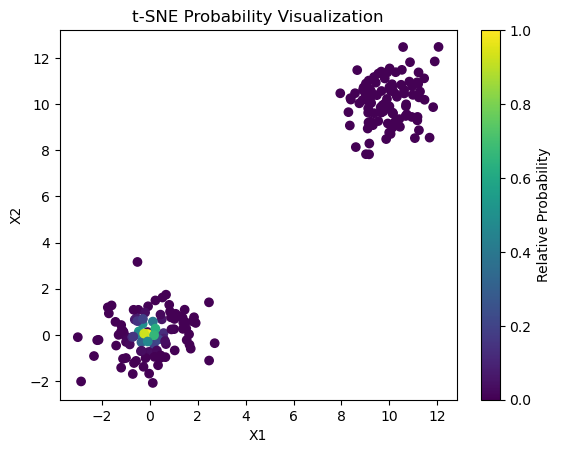

The value for sigma^2 = 10


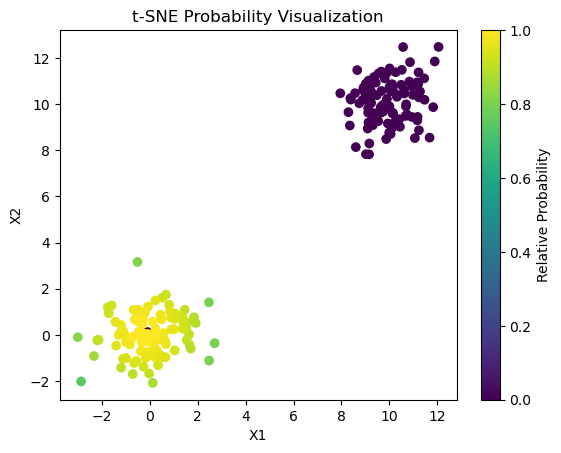

The value for sigma^2 = 100


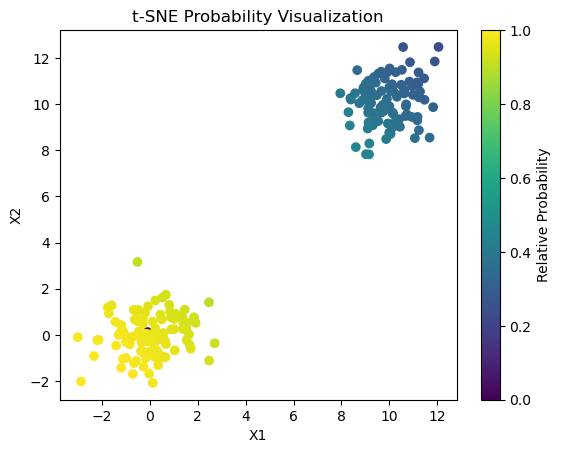

The value for sigma^2 = 1


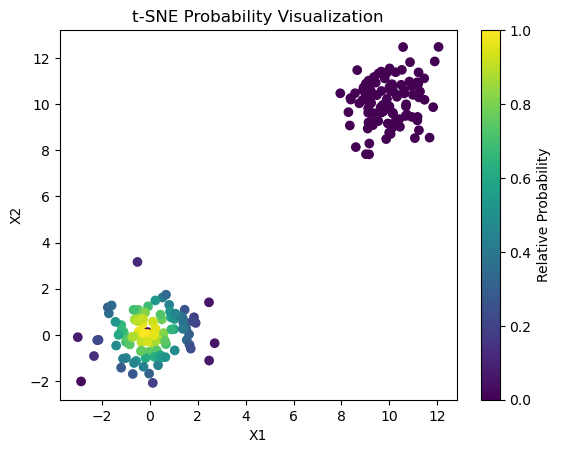

In [12]:
import matplotlib.pyplot as plt

def plot_probabilities(data, pij_matrix, base_index=0):
    n = data.shape[0]
    probabilities = pij_matrix[base_index]
    max_prob = np.max(probabilities)
    colors = probabilities / max_prob
    
    plt.scatter(data[:, 0], data[:, 1], c=colors, cmap='viridis')
    plt.colorbar(label='Relative Probability')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('t-SNE Probability Visualization')
    plt.show()
print("The value for sigma^2 = 0.1")
plot_probabilities(data, pij_matrix_sigma_1)

print("The value for sigma^2 = 10")
plot_probabilities(data, pij_matrix_sigma_2)

print("The value for sigma^2 = 100")
plot_probabilities(data, pij_matrix_sigma_3)

print("The value for sigma^2 = 1")
plot_probabilities(data, pij_matrix_sigma_4)


In [6]:
def compute_qij(y):
    n = y.shape[0]
    qij = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                qij[i, j] = (1 + np.linalg.norm(y[i] - y[j])**2)**-1
    
    qij /= np.sum(qij)
    
    return qij

y = data  # Using yi = xi
qij_matrix = compute_qij(y)
# print(qij_matrix)


[[0.00000000e+00 3.67091796e-05 1.27288028e-04 ... 7.14311664e-07
  8.50790570e-07 6.50990816e-07]
 [3.67091796e-05 0.00000000e+00 5.09964700e-05 ... 8.58208464e-07
  9.80335848e-07 7.58573976e-07]
 [1.27288028e-04 5.09964700e-05 0.00000000e+00 ... 7.32793199e-07
  8.62331998e-07 6.63278281e-07]
 ...
 [7.14311664e-07 8.58208464e-07 7.32793199e-07 ... 0.00000000e+00
  1.02517234e-05 3.31086556e-05]
 [8.50790570e-07 9.80335848e-07 8.62331998e-07 ... 1.02517234e-05
  0.00000000e+00 1.81070447e-05]
 [6.50990816e-07 7.58573976e-07 6.63278281e-07 ... 3.31086556e-05
  1.81070447e-05 0.00000000e+00]]


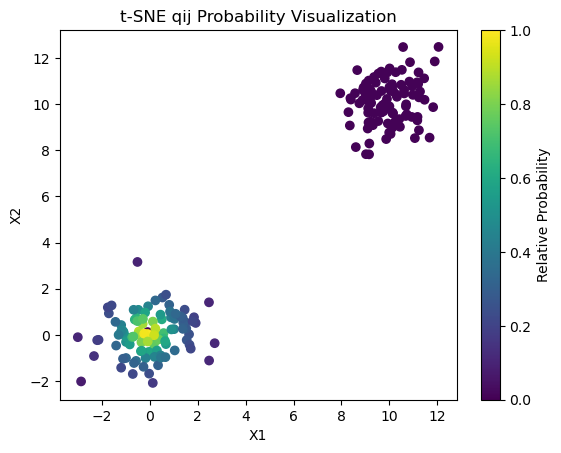

In [16]:
def plot_qij_probabilities(data, qij_matrix, base_index=0):
    n = data.shape[0]
    probabilities = qij_matrix[base_index]
    max_prob = np.max(probabilities)
    colors = probabilities / max_prob
    
    plt.scatter(data[:, 0], data[:, 1], c=colors, cmap='viridis')
    plt.colorbar(label='Relative Probability')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('t-SNE qij Probability Visualization')
    plt.show()

plot_qij_probabilities(data, qij_matrix, 0)


Comparing the plots for sigma = 1 and the plot for qij above, we can see that for the sigma = 1 graph, the probability spread is much smoother than the one for qij. The graphs are really similar because the KL divergence is really low

In [9]:
def compute_kl_divergence(pij, qij):
    kl_divergence = 0.0
    n = pij.shape[0]
    
    for i in range(n):
        for j in range(n):
            if pij[i, j] > 0:
                kl_divergence += pij[i, j] * np.log(pij[i, j] / qij[i, j])
    
    return kl_divergence

kl_divergence = compute_kl_divergence(pij_matrix_sigma_4, qij_matrix)
print("KL-Divergence:", kl_divergence)

for sigma2 in [0.1, 1, 100]:
    pji_matrix = compute_pji(data, sigma2)
    pij_matrix = compute_pij(pji_matrix)
    qij_matrix = compute_qij(data)
    kl_divergence = compute_kl_divergence(pij_matrix, qij_matrix)
    print(f"KL-Divergence for sigma^2 = {sigma2}: {kl_divergence}")




KL-Divergence: 0.10608591256867625
KL-Divergence for sigma^2 = 0.1: 1.2987869475472107
KL-Divergence for sigma^2 = 1: 0.10608591256867625
KL-Divergence for sigma^2 = 100: 0.7470215079907863


## Written Part 

# g)
The smaller the KL divergence, the more accurate the model is. The sigma values give the standard deviation of the probabilities, and a larger sigma gives a larger threshold for the probability. For the clusters above, a sigma of 1 gives the lowest KL-divergence, thus giving the best model. For these clusters, a sigma^2 value of 0.1 gives the largest divergence and thus the worst fit.

# h)
How the parameter matter? As explained above, the sigma gives the threshold for the probabilities of a point being a neighbor of another point. If the points are closer to each other, then a lower sigma would be more suitable when fitting the cluster, and a larger sigma if the points are further away.

KL-Divergence after manual adjustment: 0.09482073186203122


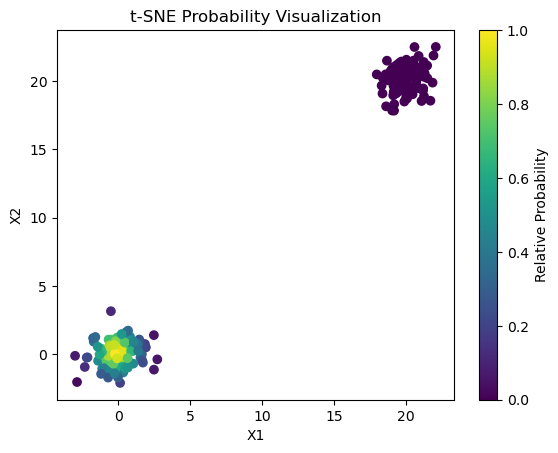

In [10]:
# Example of simple manual adjustment (moving one cluster)
data_modified = data.copy()
data_modified[99:] += np.array([10, 10])  # Move second cluster

pji_matrix = compute_pji(data_modified, 1)
pij_matrix = compute_pij(pji_matrix)
qij_matrix = compute_qij(data_modified)
kl_divergence = compute_kl_divergence(pij_matrix, qij_matrix)
print("KL-Divergence after manual adjustment:", kl_divergence)

plot_probabilities(data_modified, pij_matrix)


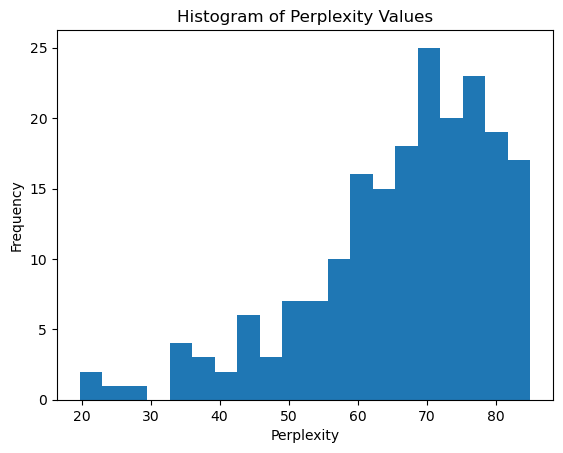

KL-Divergence for sigma^2 = 5: 0.12603272349506978
KL-Divergence for sigma^2 = 25: 0.20667967737238585
KL-Divergence for sigma^2 = 50: 0.36664980915210116
KL-Divergence for sigma^2 = 100: 0.7470215079907863


In [11]:
def calculate_perplexity(pij_matrix):
    perplexities = []
    n = pij_matrix.shape[0]
    
    for i in range(n):
        pi = pij_matrix[i]
        entropy = -np.sum(pi * np.log2(pi + 1e-12))
        perplexity = 2 ** entropy
        perplexities.append(perplexity)
    
    return perplexities

perplexities = calculate_perplexity(pji_matrix)
plt.hist(perplexities, bins=20)
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.title('Histogram of Perplexity Values')
plt.show()

# Compute KL-divergence for given perplexities
sigma2_values = [5, 25, 50, 100]
for sigma2 in sigma2_values:
    pji_matrix = compute_pji(data, sigma2)
    pij_matrix = compute_pij(pji_matrix)
    qij_matrix = compute_qij(data)
    kl_divergence = compute_kl_divergence(pij_matrix, qij_matrix)
    print(f"KL-Divergence for sigma^2 = {sigma2}: {kl_divergence}")


In [17]:
print("The value for sigma^2 = 5")

The value for sigma^2 = 5


hi